### Imports

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Data validation

#### Dataset 1 - flights

In [2]:
flights = pd.read_csv('flights.csv', 
                      encoding='latin-1', 
                      dtype={'YEAR': 'int', 
                             'MONTH_NUM': 'int',
                             'MONTH_MON': 'str',
                             'FLT_DATE': 'str',
                             'APT_ICAO': 'str',
                             'APT_NAME': 'str',
                             'STATE_NAME': 'str',
                             'FLT_DEP_1': 'int',
                             'FLT_ARR_1': 'int',
                             'FLT_TOT_1': 'int',
                             'FLT_DEP_IFR_2': 'float',
                             'FLT_ARR_IFR_2': 'float',
                             'FLT_TOT_IFR_2': 'float',
                             'Pivot Label': 'str'})

In [3]:
flights.head()

,YEAR,MONTH_NUM,MONTH_MON,FLT_DATE,APT_ICAO,APT_NAME,STATE_NAME,FLT_DEP_1,FLT_ARR_1,FLT_TOT_1,FLT_DEP_IFR_2,FLT_ARR_IFR_2,FLT_TOT_IFR_2,Pivot Label
0,2016,1,JAN,2016-01-01T00:00:00Z,EBAW,Antwerp,Belgium,4,3,7,NaN,NaN,NaN,Antwerp (EBAW)
1,2016,1,JAN,2016-01-01T00:00:00Z,EBBR,Brussels,Belgium,174,171,345,174.0,161.0,335.0,Brussels (EBBR)
2,2016,1,JAN,2016-01-01T00:00:00Z,EBCI,Charleroi,Belgium,45,47,92,45.0,45.0,90.0,Charleroi (EBCI)
3,2016,1,JAN,2016-01-01T00:00:00Z,EBLG,LiÌ¬ge,Belgium,6,7,13,NaN,NaN,NaN,LiÌ¬ge (EBLG)
4,2016,1,JAN,2016-01-01T00:00:00Z,EBOS,Ostend-Bruges,Belgium,7,7,14,NaN,NaN,NaN,Ostend-Bruges (EBOS)


In [4]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726436 entries, 0 to 726435
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   YEAR           726436 non-null  int64  
 1   MONTH_NUM      726436 non-null  int64  
 2   MONTH_MON      726436 non-null  object 
 3   FLT_DATE       726436 non-null  object 
 4   APT_ICAO       726436 non-null  object 
 5   APT_NAME       726436 non-null  object 
 6   STATE_NAME     726436 non-null  object 
 7   FLT_DEP_1      726436 non-null  int64  
 8   FLT_ARR_1      726436 non-null  int64  
 9   FLT_TOT_1      726436 non-null  int64  
 10  FLT_DEP_IFR_2  216500 non-null  float64
 11  FLT_ARR_IFR_2  216500 non-null  float64
 12  FLT_TOT_IFR_2  216500 non-null  float64
 13  Pivot Label    688099 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 77.6+ MB


##### Dropping columns

In [5]:
flights = flights.drop(columns = ['FLT_DEP_IFR_2', 'FLT_ARR_IFR_2', 'FLT_TOT_IFR_2', 'Pivot Label'])

##### Renaming columns

In [6]:
flights.columns = ['Year', 'Month_num', 'Month', 'Flight_date', 'Airport_code', 'Airport_name', 'Country', 'Total_departures', 'Total_arrivals', 'Total_movements'] 

##### Data cleaning

In [7]:
flights['Month'] = flights['Month'].str.lower()
flights['Month'] = flights['Month'].str.capitalize()

In [8]:
flights['Flight_date'] = flights['Flight_date'].apply(lambda x: x.split('T')[0])

In [9]:
flights['Flight_date'] = pd.to_datetime(flights['Flight_date'], format="%Y/%m/%d")

In [10]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726436 entries, 0 to 726435
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Year              726436 non-null  int64         
 1   Month_num         726436 non-null  int64         
 2   Month             726436 non-null  object        
 3   Flight_date       726436 non-null  datetime64[ns]
 4   Airport_code      726436 non-null  object        
 5   Airport_name      726436 non-null  object        
 6   Country           726436 non-null  object        
 7   Total_departures  726436 non-null  int64         
 8   Total_arrivals    726436 non-null  int64         
 9   Total_movements   726436 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 55.4+ MB


In [11]:
flights = flights.replace({'Airport_name': {
    'LiÌ¬ge': 'Liege',
    'Szczecin - GoleniÌ_w': 'Szczecin - Goleniow',
    'GÌ¦teborg': 'Goteborg',
    'MÌÁlaga': 'Malaga',
    'Bordeaux-MÌ©rignac': 'Bordeaux-Merignac',
    'Bergerac-RoumaniÌ¬re': 'Bergerac-Roumaniere',
    'La Rochelle-Ile de RÌ©': 'La Rochelle',
    'Pau-PyrÌ©nÌ©es': 'Pau Pyrenees',
    'Tarbes-Lourdes PyrÌ©nÌ©es': 'Tarbes-Lourdes Pyrenees',
    'DÌ«le-Tavaux': 'Dole–Tavaux',
    'Ajaccio-NapolÌ©on-Bonaparte': 'Ajaccio Napoleon Bonaparte',
    'ChambÌ©ry-Aix-les-Bains': 'Chambery-Aix-les-Bains',
    'Lyon-Saint-ExupÌ©ry': 'Lyon–Saint Exupery',
    'Grenoble-IsÌ¬re': 'Grenoble-Isere',
    'Saint-Etienne-BouthÌ©on': 'Saint-Etienne-Boutheon',
    "Nice-CÌ«te d\x89ÛªAzur": "Nice Cote d'Azur",
    'Montpellier-MÌ©diterranÌ©e': 'Montpellier–Mediterranee',
    'BÌ©ziers-Vias': 'Beziers-Vias',
    'Beauvais-TillÌ©': 'Beauvais-Tille',
    'ChÌ¢lons-Vatry': 'Chalons-Vatry',
    'Lorient-Lann BihouÌ©': 'Lorient Lann Bihoue',
    'BÌ¢le-Mulhouse': 'Basel-Mulhouse',
    'HyÌ¬res-Le Palyvestre': 'Hy res Le Palyvestre',
    'NÌ¨mes-Garons': 'Nimes-Garons',
    'Portoro\x81_': 'Portoroz',
    'Brno-Tu\x81ªany': 'Brno–Turany',
    'ZÌ_rich': 'Zurich',
    'Ankara - Esenbo\x80Ùa': 'Ankara Esenboga',
    'Istanbul AtatÌ_rk': 'Istanbul Ataturk',
    'Istanbul Sabiha GÌ¦kÌ¤en': 'Istanbul Sabiha Gokcen',
    'Chiéªin\x80Äu': 'Chisinau',
    'Angers-MarcÌ©': 'Angers-Marce',
    'ChÌ¢teauroux-DÌ©ols': 'Chateauroux-Deols',
    'Istres-Le TubÌ©': 'Istres-Le Tube',
    'Bucharest - B\x80Äneasa': 'Bucharest - Baneasa',
    'Lu\x80\x8dko': 'Luxembourg',
    'BodÌü': 'Bodo',
    "BerlevÌ´g": "Berlevag",
    'FlorÌü': 'Floro',
    'HonningsvÌ´g Valan': 'Honningsvag Valan',
    'Kirkenes HÌüybuktmoen': 'Kirkenes Hoybuktmoen',
    'Molde ÌÉrÌü': 'Molde Aro',
    'MosjÌüen KjÌ_rstad': 'Mosjoen Kjaerstad',
    'Namsos HÌüknesÌüra': 'Namsos Hoknesora',
    'OrstaåÀVolda Hovden': 'Orsta-Volda Hovden',
    'Mo i Rana RÌüssvoll': 'Mo i Rana Rossvoll',
    'Sogndal HaukÌ´sen': 'Sogndal Haukasen',
    'SvolvÌ_r Helle': 'Svolvaer Helle',
    'VardÌü Svartnes': 'Vardo Svartnes',
    'SandnessjÌüen Stokka': 'Sandnessjoen Stokka',
    'TromsÌü': 'Tromso',
    'VadsÌü': 'Vadso',
    'VÌ_rÌüy': 'Vaeroy',
    'SaÌøss': 'Saiss',
    'Rabat-SalÌ©': 'Rabat–Sale',
    'RegiÌ_n de Murcia International Airport': 'Region de Murcia',
    'Li\x8fge': 'Liege',
    'Bod¿': 'Bodo',
    'Berlev\x8cg': 'Berlevag',
    'Flor¿': 'Floro',
    'Honningsv\x8cg Valan': 'Honningsvag Valan',
    'Kirkenes H¿ybuktmoen': 'Kirkenes Hoybuktmoen',
    'Molde \x81r¿': 'Molde Aro',
    'Mosj¿en Kj¾rstad': 'Mosjoen Kjaerstad',
    'Namsos H¿knes¿ra': 'Namsos Hoknesora',
    'OrstaÀVolda Hovden': 'Orsta-Volda Hovden',
    'Mo i Rana R¿ssvoll': 'Mo i Rana Rossvoll',
    'Sogndal Hauk\x8csen': 'Sogndal Haukasen',
    'Svolv¾r Helle': 'Svolvaer Helle',
    'Vard¿ Svartnes': 'Vardo Svartnes',
    'Sandnessj¿en Stokka': 'Sandnessjoen Stokka',
    'Troms¿': 'Tromso',
    'Vads¿': 'Vadso',
    'V¾r¿y': 'Vaeroy',
    'Szczecin - Goleni\x97w': 'Szczecin - Goleniow', 
    'G\x9ateborg': 'Goteborg', 
    'Sa\x95ss': 'Saiss',
    'Rabat-Sal\x8e': 'Rabat–Sale',
    'Lu_ko': 'Lucko', 
    'M\x87laga': 'Malaga',
    'Regi\x97n de Murcia International Airport': 'Region de Murcia',
    'Bordeaux-M\x8erignac': 'Bordeaux-Merignac',
    'Bergerac-Roumani\x8fre': 'Bergerac-Roumaniere',
    'La Rochelle-Ile de R\x8e': 'La Rochelle',
    'Pau-Pyr\x8en\x8ees': 'Pau Pyrenees',
    'Tarbes-Lourdes Pyr\x8en\x8ees': 'Tarbes-Lourdes Pyrenees',
    'D\x99le-Tavaux': 'Dole–Tavaux',
    'Angers-Marc\x8e': 'Angers-Marce',
    'Ajaccio-Napol\x8eon-Bonaparte': 'Ajaccio Napoleon Bonaparte',
    'Chamb\x8ery-Aix-les-Bains': 'Chambery-Aix-les-Bains',
    'Lyon-Saint-Exup\x8ery': 'Lyon–Saint Exupery',
    'Grenoble-Is\x8fre': 'Grenoble-Isere',
    'Ch\x89teauroux-D\x8eols': 'Chateauroux-Deols',
    'Saint-Etienne-Bouth\x8eon': 'Saint-Etienne-Boutheon',
    'Istres-Le Tub\x8e': 'Istres-Le Tube',
    "Nice-C\x99te dÕAzur": "Nice Cote d'Azur",
    'Montpellier-M\x8editerran\x8ee': 'Montpellier–Mediterranee',
    'B\x8eziers-Vias': 'Beziers-Vias',
    'Beauvais-Till\x8e': 'Beauvais-Tille',
    'Ch\x89lons-Vatry': 'Chalons-Vatry',
    'Lorient-Lann Bihou\x8e': 'Lorient Lann Bihoue',
    'B\x89le-Mulhouse': 'Basel-Mulhouse',
    'Hy\x8fres-Le Palyvestre': 'Hy res Le Palyvestre', 
    'N\x94mes-Garons': 'Nimes-Garons',
    'Portoro_': 'Portoroz',
    'Brno-Tu_any': 'Brno–Turany',
    'Bucharest - B_neasa': 'Bucharest - Baneasa',
    'Z\x9frich': 'Zurich',
    'Ankara - Esenbo_a': 'Ankara Esenboga',
    'Istanbul Atat\x9frk': 'Istanbul Ataturk',
    'Istanbul Sabiha G\x9ak\x8den': 'Istanbul Sabiha Gokcen',
    "Chi_in_u": "Chisinau"
}})

In [12]:
flights = flights.replace({'Country': {
    'TÌ_rkiye': 'Turkey',
    'T\x9frkiye': 'Turkey'
}})

In [13]:
flights.head(10)

,Year,Month_num,Month,Flight_date,Airport_code,Airport_name,Country,Total_departures,Total_arrivals,Total_movements
0,2016,1,Jan,2016-01-01,EBAW,Antwerp,Belgium,4,3,7
1,2016,1,Jan,2016-01-01,EBBR,Brussels,Belgium,174,171,345
2,2016,1,Jan,2016-01-01,EBCI,Charleroi,Belgium,45,47,92
3,2016,1,Jan,2016-01-01,EBLG,Liege,Belgium,6,7,13
4,2016,1,Jan,2016-01-01,EBOS,Ostend-Bruges,Belgium,7,7,14
5,2016,1,Jan,2016-01-01,EDDB,Berlin - Brandenburg,Germany,98,99,197
6,2016,1,Jan,2016-01-01,EDDC,Dresden,Germany,18,21,39
7,2016,1,Jan,2016-01-01,EDDE,Erfurt,Germany,1,1,2
8,2016,1,Jan,2016-01-01,EDDF,Frankfurt,Germany,401,341,742
9,2016,1,Jan,2016-01-01,EDDG,Muenster-Osnabrueck,Germany,3,4,7


In [14]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726436 entries, 0 to 726435
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Year              726436 non-null  int64         
 1   Month_num         726436 non-null  int64         
 2   Month             726436 non-null  object        
 3   Flight_date       726436 non-null  datetime64[ns]
 4   Airport_code      726436 non-null  object        
 5   Airport_name      726436 non-null  object        
 6   Country           726436 non-null  object        
 7   Total_departures  726436 non-null  int64         
 8   Total_arrivals    726436 non-null  int64         
 9   Total_movements   726436 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 55.4+ MB


#### Dataset 2 - delays

In [15]:
delays = pd.read_csv('delays.csv', encoding='latin-1')

In [16]:
delays.head()

,ï»¿YEAR,MONTH_NUM,MONTH_MON,FLT_DATE,APT_ICAO,APT_NAME,STATE_NAME,FLT_DEP_1,FLT_DEP_IFR_2,DLY_ATC_PRE_2,FLT_DEP_3,DLY_ATC_PRE_3
0,2016,1,JAN,01/01/2016,EBAW,Antwerp,Belgium,4,NaN,NaN,2.0,0.0
1,2016,1,JAN,01/01/2016,EBBR,Brussels,Belgium,174,174.0,59.0,137.0,48.0
2,2016,1,JAN,01/01/2016,EBCI,Charleroi,Belgium,45,45.0,0.0,43.0,0.0
3,2016,1,JAN,01/01/2016,EBLG,LiÃ¨ge,Belgium,6,NaN,NaN,NaN,NaN
4,2016,1,JAN,01/01/2016,EBOS,Ostend-Bruges,Belgium,7,NaN,NaN,4.0,0.0


In [17]:
delays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733169 entries, 0 to 733168
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ï»¿YEAR        733169 non-null  int64  
 1   MONTH_NUM      733169 non-null  int64  
 2   MONTH_MON      733169 non-null  object 
 3   FLT_DATE       733169 non-null  object 
 4   APT_ICAO       733169 non-null  object 
 5   APT_NAME       733169 non-null  object 
 6   STATE_NAME     733169 non-null  object 
 7   FLT_DEP_1      733169 non-null  int64  
 8   FLT_DEP_IFR_2  176189 non-null  float64
 9   DLY_ATC_PRE_2  176189 non-null  object 
 10  FLT_DEP_3      564485 non-null  float64
 11  DLY_ATC_PRE_3  564485 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 67.1+ MB


##### Dropping columns

In [18]:
delays = delays.drop(columns = ['FLT_DEP_IFR_2', 'FLT_DEP_3', 'DLY_ATC_PRE_2'])

##### Renaming columns

In [19]:
delays.columns = ['Year', 'Month_num', 'Month', 'Flight_date', 'Airport_code', 'Airport_name', 'Country', 'Total_departures', 'Minutes_delayed']

##### Data cleaning

In [20]:
delays['Month'] = delays['Month'].str.lower()
delays['Month'] = delays['Month'].str.capitalize()

In [21]:
delays = delays.replace({'Airport_name': {
    'LiÃ¨ge': 'Liege',
    'Szczecin - GoleniÃ³w': 'Szczecin - Goleniow',
    'GÃ¶teborg': 'Goteborg',
    'MÃ¡laga': 'Malaga',
    'Bordeaux-MÃ©rignac': 'Bordeaux-Merignac',
    'Bergerac-RoumaniÃ¨re': 'Bergerac-Roumaniere',
    'La Rochelle-Ile de RÃ©': 'La Rochelle',
    'Pau-PyrÃ©nÃ©es': 'Pau Pyrenees',
    'Tarbes-Lourdes PyrÃ©nÃ©es': 'Tarbes-Lourdes Pyrenees',
    'DÃ´le-Tavaux': 'Dole Tavaux',
    'Ajaccio-NapolÃ©on-Bonaparte': 'Ajaccio Napoleon Bonaparte',
    'ChambÃ©ry-Aix-les-Bains': 'Chambery-Aix-les-Bains',
    'Lyon-Saint-ExupÃ©ry': 'Lyon–Saint Exupery',
    'Grenoble-IsÃ¨re': 'Grenoble-Isere',
    'Saint-Etienne-BouthÃ©on': 'Saint-Etienne-Boutheon',
    "Nice-CÃ´te dâ\x80\x99Azur": "Nice Cote d'Azur",
    'Montpellier-MÃ©diterranÃ©e': 'Montpellier–Mediterranee',
    'BÃ©ziers-Vias': 'Beziers-Vias',
    'Beauvais-TillÃ©': 'Beauvais-Tille',
    'ChÃ¢lons-Vatry': 'Chalons-Vatry',
    'Lorient-Lann BihouÃ©': 'Lorient Lann Bihoue',
    'BÃ¢le-Mulhouse': 'Basel-Mulhouse',
    'HyÃ¨res-Le Palyvestre': 'Hy res Le Palyvestre',
    'NÃ®mes-Garons': 'Nimes-Garons', 
    'PortoroÅ¾': 'Portoroz',
    'Brno-TuÅ\x99any': 'Brno–Turany',
    'ZÃ¼rich': 'Zurich',
    'Ankara - EsenboÄ\x9fa': 'Ankara Esenboga',
    'Istanbul - AtatÃ¼rk': 'Istanbul Ataturk',
    'Istanbul - Sabiha GÃ¶kÃ§en': 'Istanbul Sabiha Gokcen',
    'ChiÈ\x99inÄ\x83u': 'Chisinau',
    'Angers-MarcÃ©': 'Angers-Marce',
    'ChÃ¢teauroux-DÃ©ols': 'Chateauroux-Deols',
    'Istres-Le TubÃ©': 'Istres-Le Tube',
    'Bucharest - BÄ\x83neasa': 'Bucharest - Beneasa', 
    'LuÄ\x8dko': 'Luxembourg',
    'BodÃ¸': 'Bodo',
    'BerlevÃ¥g': 'Berlevag',
    'FlorÃ¸': 'Floro',
    'HonningsvÃ¥g Valan': 'Honningsvag Valan', 
    'Kirkenes HÃ¸ybuktmoen': 'Kirkenes Hoybuktmoen',
    'Molde Ã\x85rÃ¸': 'Molde Aro',
    'MosjÃ¸en KjÃ¦rstad': 'Mosjoen Kjaerstad',
    'Namsos HÃ¸knesÃ¸ra': 'Namsos Hoknesora',
    'OrstaÂ¿Volda Hovden': 'Orsta-Volda Hovden',
    'Mo i Rana RÃ¸ssvoll': 'Mo i Rana Rossvoll',
    'Sogndal HaukÃ¥sen': 'Sogndal Haukasen',
    'SvolvÃ¦r Helle': 'Svolvaer Helle',
    'VardÃ¸ Svartnes': 'Vardo Svartnes',
    'SandnessjÃ¸en Stokka': 'Sandnessjoen Stokka',
    'TromsÃ¸': 'Tromso',
    'VadsÃ¸': 'Vadso',
    'SaÃ¯ss': 'Saiss',
    'Rabat-SalÃ©': 'Rabat–Sale',
    'VÃ¦rÃ¸y': 'Vaeroy',
    'Istanbul AtatÃ¼rk': 'Istanbul Ataturk',
    'Istanbul Sabiha GÃ¶kÃ§en': 'Istanbul Sabiha Gokcen',
}})

In [22]:
delays = delays.replace({'Country': {'TÃ¼rkiye': 'Turkey'}})

In [23]:
delays = delays.dropna(how='any')

In [24]:
delays.head()

,Year,Month_num,Month,Flight_date,Airport_code,Airport_name,Country,Total_departures,Minutes_delayed
0,2016,1,Jan,01/01/2016,EBAW,Antwerp,Belgium,4,0.0
1,2016,1,Jan,01/01/2016,EBBR,Brussels,Belgium,174,48.0
2,2016,1,Jan,01/01/2016,EBCI,Charleroi,Belgium,45,0.0
4,2016,1,Jan,01/01/2016,EBOS,Ostend-Bruges,Belgium,7,0.0
5,2016,1,Jan,01/01/2016,EDDB,Berlin - Brandenburg,Germany,98,36.0


In [25]:
delays.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564485 entries, 0 to 733168
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Year              564485 non-null  int64 
 1   Month_num         564485 non-null  int64 
 2   Month             564485 non-null  object
 3   Flight_date       564485 non-null  object
 4   Airport_code      564485 non-null  object
 5   Airport_name      564485 non-null  object
 6   Country           564485 non-null  object
 7   Total_departures  564485 non-null  int64 
 8   Minutes_delayed   564485 non-null  object
dtypes: int64(3), object(6)
memory usage: 43.1+ MB


### Data Analysis

#### Q1: How do flights compare pre- and post-pandemic in the UK?

In [26]:
#   Notes:

#   29 Jan 2020: Covid-19 pandemic arrival date in the UK
#   4 Oct 2021: England’s traffic light system for foreign travel is scrapped 
#               and replaced with a single red list of countries
#   6 Oct 2021: UK lifts its guidance to avoid non-essential travel to 32 countries
#
#   Source: British Foreign Policy Group (BFPG)


In [27]:
uk_flights = flights[flights['Country'] == 'United Kingdom']

In [28]:
uk_flights['year_month'] = uk_flights['Flight_date'].dt.to_period('M')
uk_flights['year_month'] = uk_flights['year_month'].dt.to_timestamp()
uk_flights['Quarter'] = pd.PeriodIndex(uk_flights['year_month'], freq='Q')
uk_flights['Quarter'] = uk_flights['Quarter'].astype('str')

In [29]:
#  Estimating percentage difference in the number of total departures 
#  in the two years post-pandemic compared to two years pre-pandemic:

pre_covid_total = uk_flights.loc[uk_flights['Year'].isin([2018, 2019])].Total_departures.sum()
post_covid_total = uk_flights.loc[uk_flights['Year'].isin([2020, 2021])].Total_departures.sum()

perc_diff = (pre_covid_total - post_covid_total) / pre_covid_total * 100
print('Flight departures decreased by approx.: ', round(perc_diff), '%', sep='')

Flight departures decreased by approx.: 62%


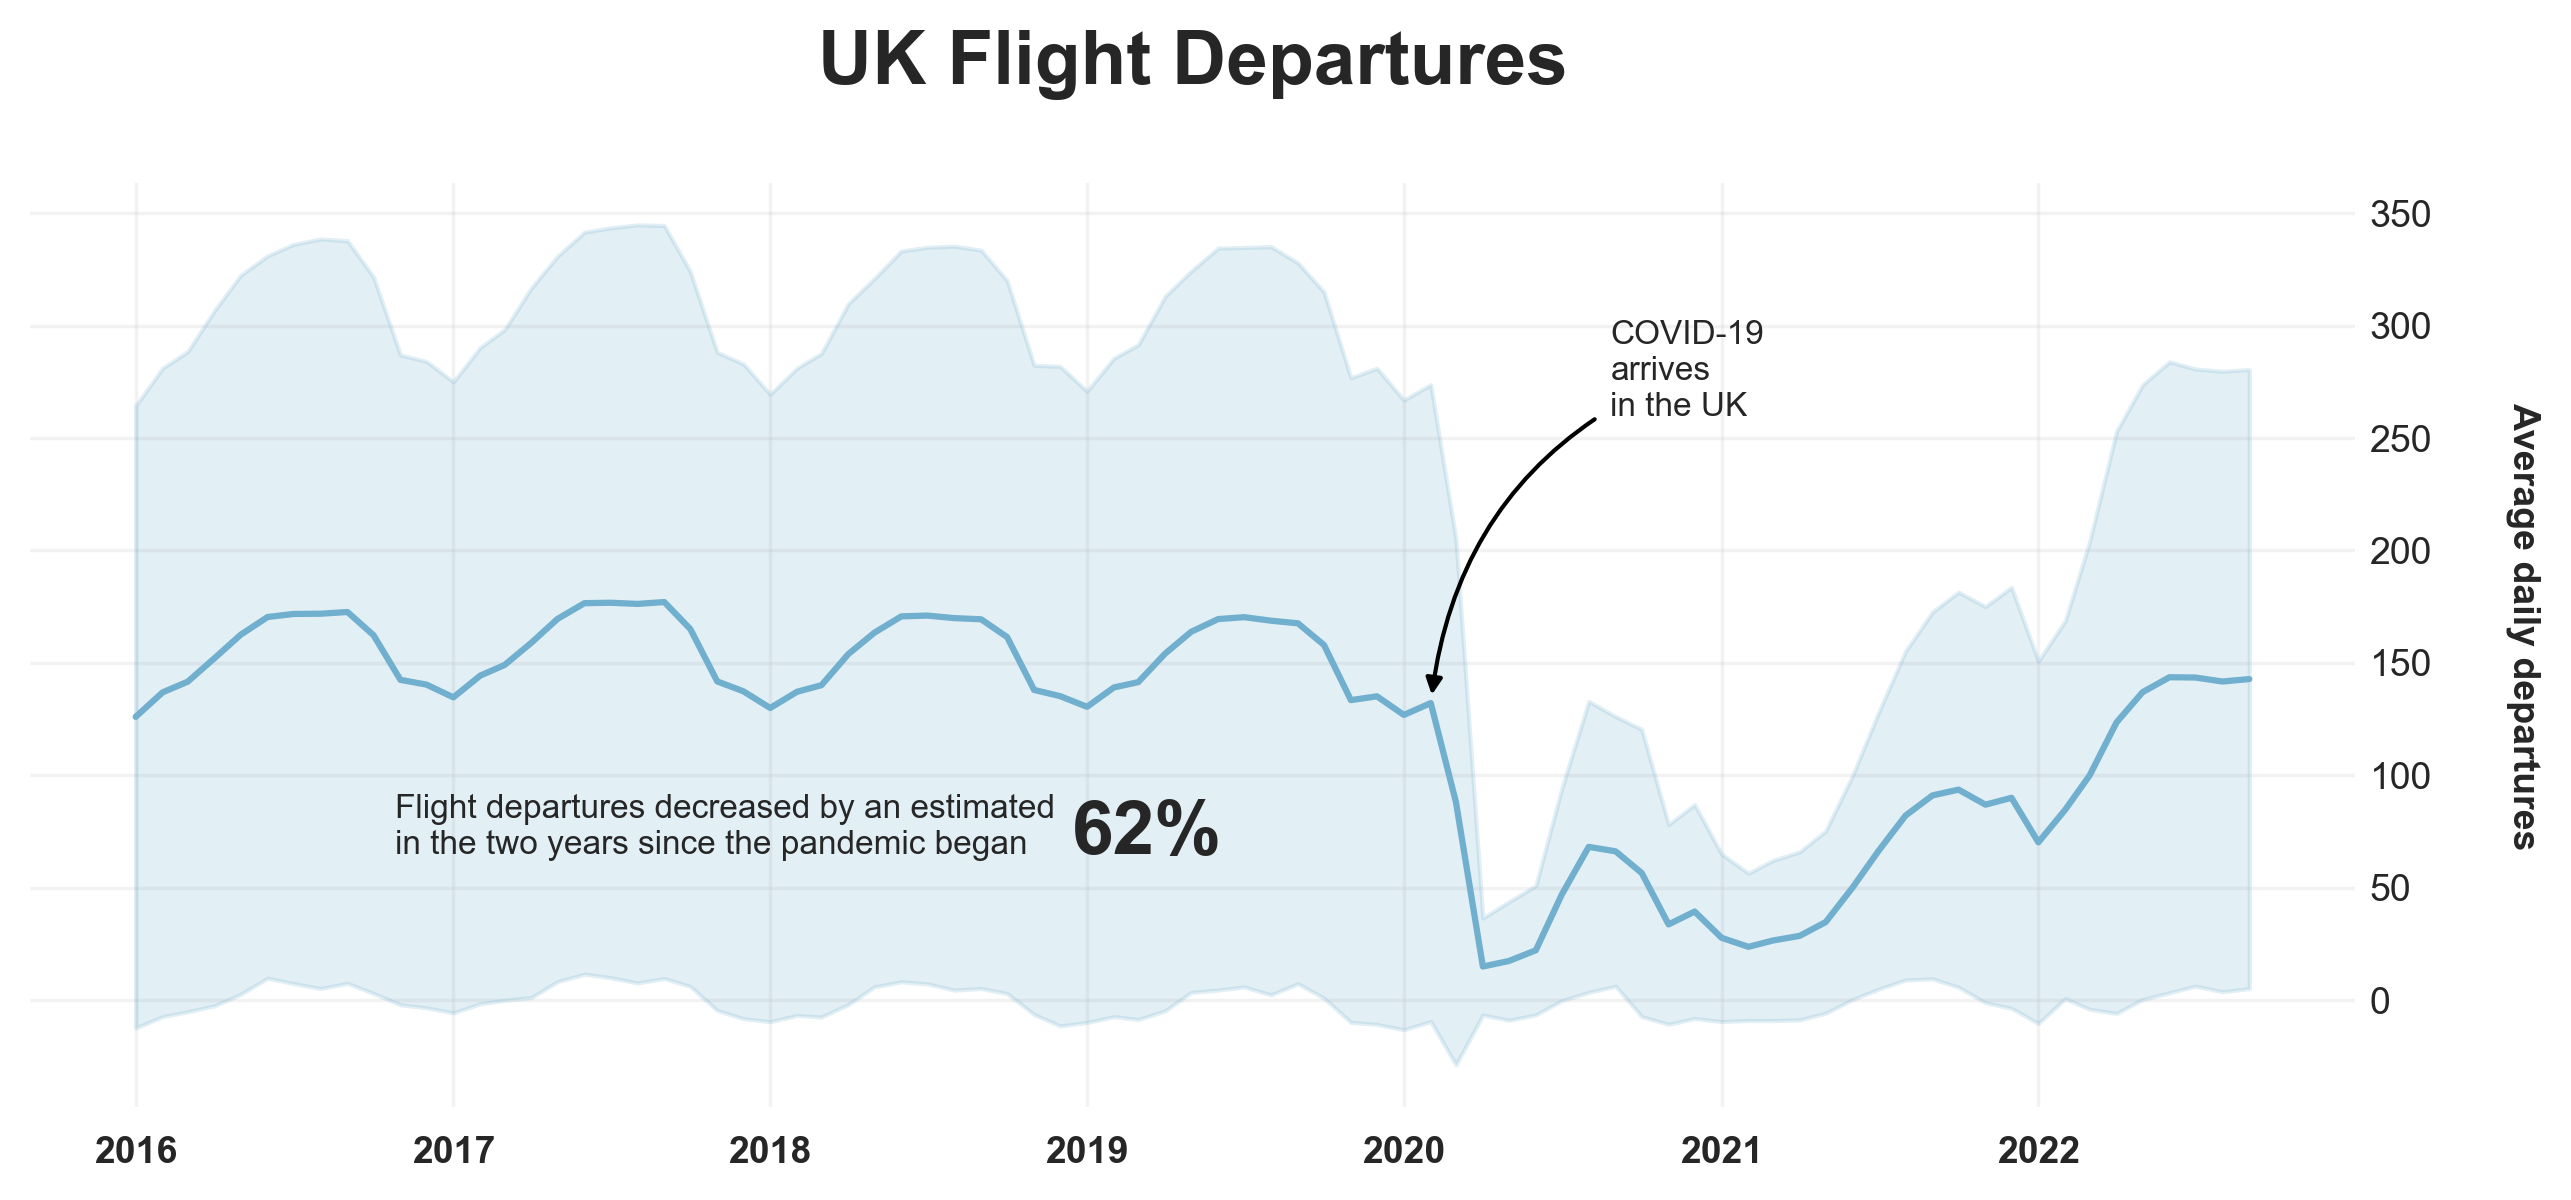

In [30]:
sns.set_style('white')

fig, ax = plt.subplots(dpi=300, figsize=(10, 4))

x_labels = uk_flights['Year'].astype('str')

sns.lineplot(data=uk_flights, x='year_month', y='Total_departures', ci='sd', color='#70AFCE', estimator='mean')

plt.title('UK Flight Departures', fontsize=18, weight='bold', x=.5, y=1.08)

ax.set_xlabel('')
ax.xaxis.set_tick_params(labelsize = 9)
ax.set_xticklabels(range(2015, 2024), weight='bold')

ax.yaxis.tick_right()
ax.set_ylabel('Average daily departures', weight='bold', fontsize=9, rotation=270)
ax.yaxis.set_label_position("right")
ax.yaxis.set_label_coords(1.08, .52)
ax.tick_params(axis='y', zorder=0, length=0, labelsize = 9)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.grid(visible=True, alpha=0.25)


ax.annotate("COVID-19\narrives\nin the UK",
            xy=(18293, 132.136),
            xytext=(18500, 260),
            size=8,
            arrowprops={'arrowstyle': '-|>', 'connectionstyle': 'arc3,rad=0.3', 'color': 'black'})

ax.annotate("Flight departures decreased by an estimated\nin the two years since the pandemic began",
            xy=(17100, 65),
            xytext=(17100, 65),
            size=8)
ax.annotate("62%",
            xy=(17880, 65),
            xytext=(17880, 65),
            size=18,
            weight='bold')


plt.show()

#ax.lines[0].get_data()

#### Section summary:

- As expected, flight departures in the UK dropped significantly when COVID-19 pandemic began.
- In the two years since the beginning of the pandemic, 62% less flights departed compared to the last two years before the pandemic.
- In the third quarter of 2022 flight departures are still not at pre-pandemic levels.

#### Q2: How has the UK recovered from Covid-19 compared to other major EU countries?

In [31]:
eu_flights = flights[flights['Country'].isin(['Spain', 'Germany', 'United Kingdom', 'France', 'Italy'])]

In [32]:
eu_flights['year_month'] = eu_flights['Flight_date'].dt.to_period('M')
eu_flights['year_month'] = eu_flights['year_month'].dt.to_timestamp()

In [33]:
#  Estimating median departures per country pre- and post-pandemic:

median_departures = eu_flights.groupby(['Year', 'Country'])['Total_departures'].median()
median_departures = pd.DataFrame(median_departures).reset_index()


#  Pivoting table and leaving years 2019 and 2022:

median_departures = median_departures.pivot(index='Country', columns='Year', values='Total_departures')
median_departures = median_departures.reset_index(level=0)
median_departures = median_departures.drop([2016, 2017, 2018, 2020, 2021], axis=1)


#  Adding a 'perc_of_2019' column which shows what percentage of 2019 levels 
#  flights constitute (on average) in 2022:

median_departures['perc_of_2019'] = round(median_departures[2022] / median_departures[2019] * 100)
median_departures = median_departures.rename(columns={2019: 'pre-covid', 2022: 'post_covid'})
median_departures = median_departures.rename_axis(None, axis=1)
median_departures

,Country,pre-covid,post_covid,perc_of_2019
0,France,10.0,9.0,90.0
1,Germany,117.0,83.0,71.0
2,Italy,101.0,91.0,90.0
3,Spain,14.0,13.0,93.0
4,United Kingdom,94.0,73.0,78.0


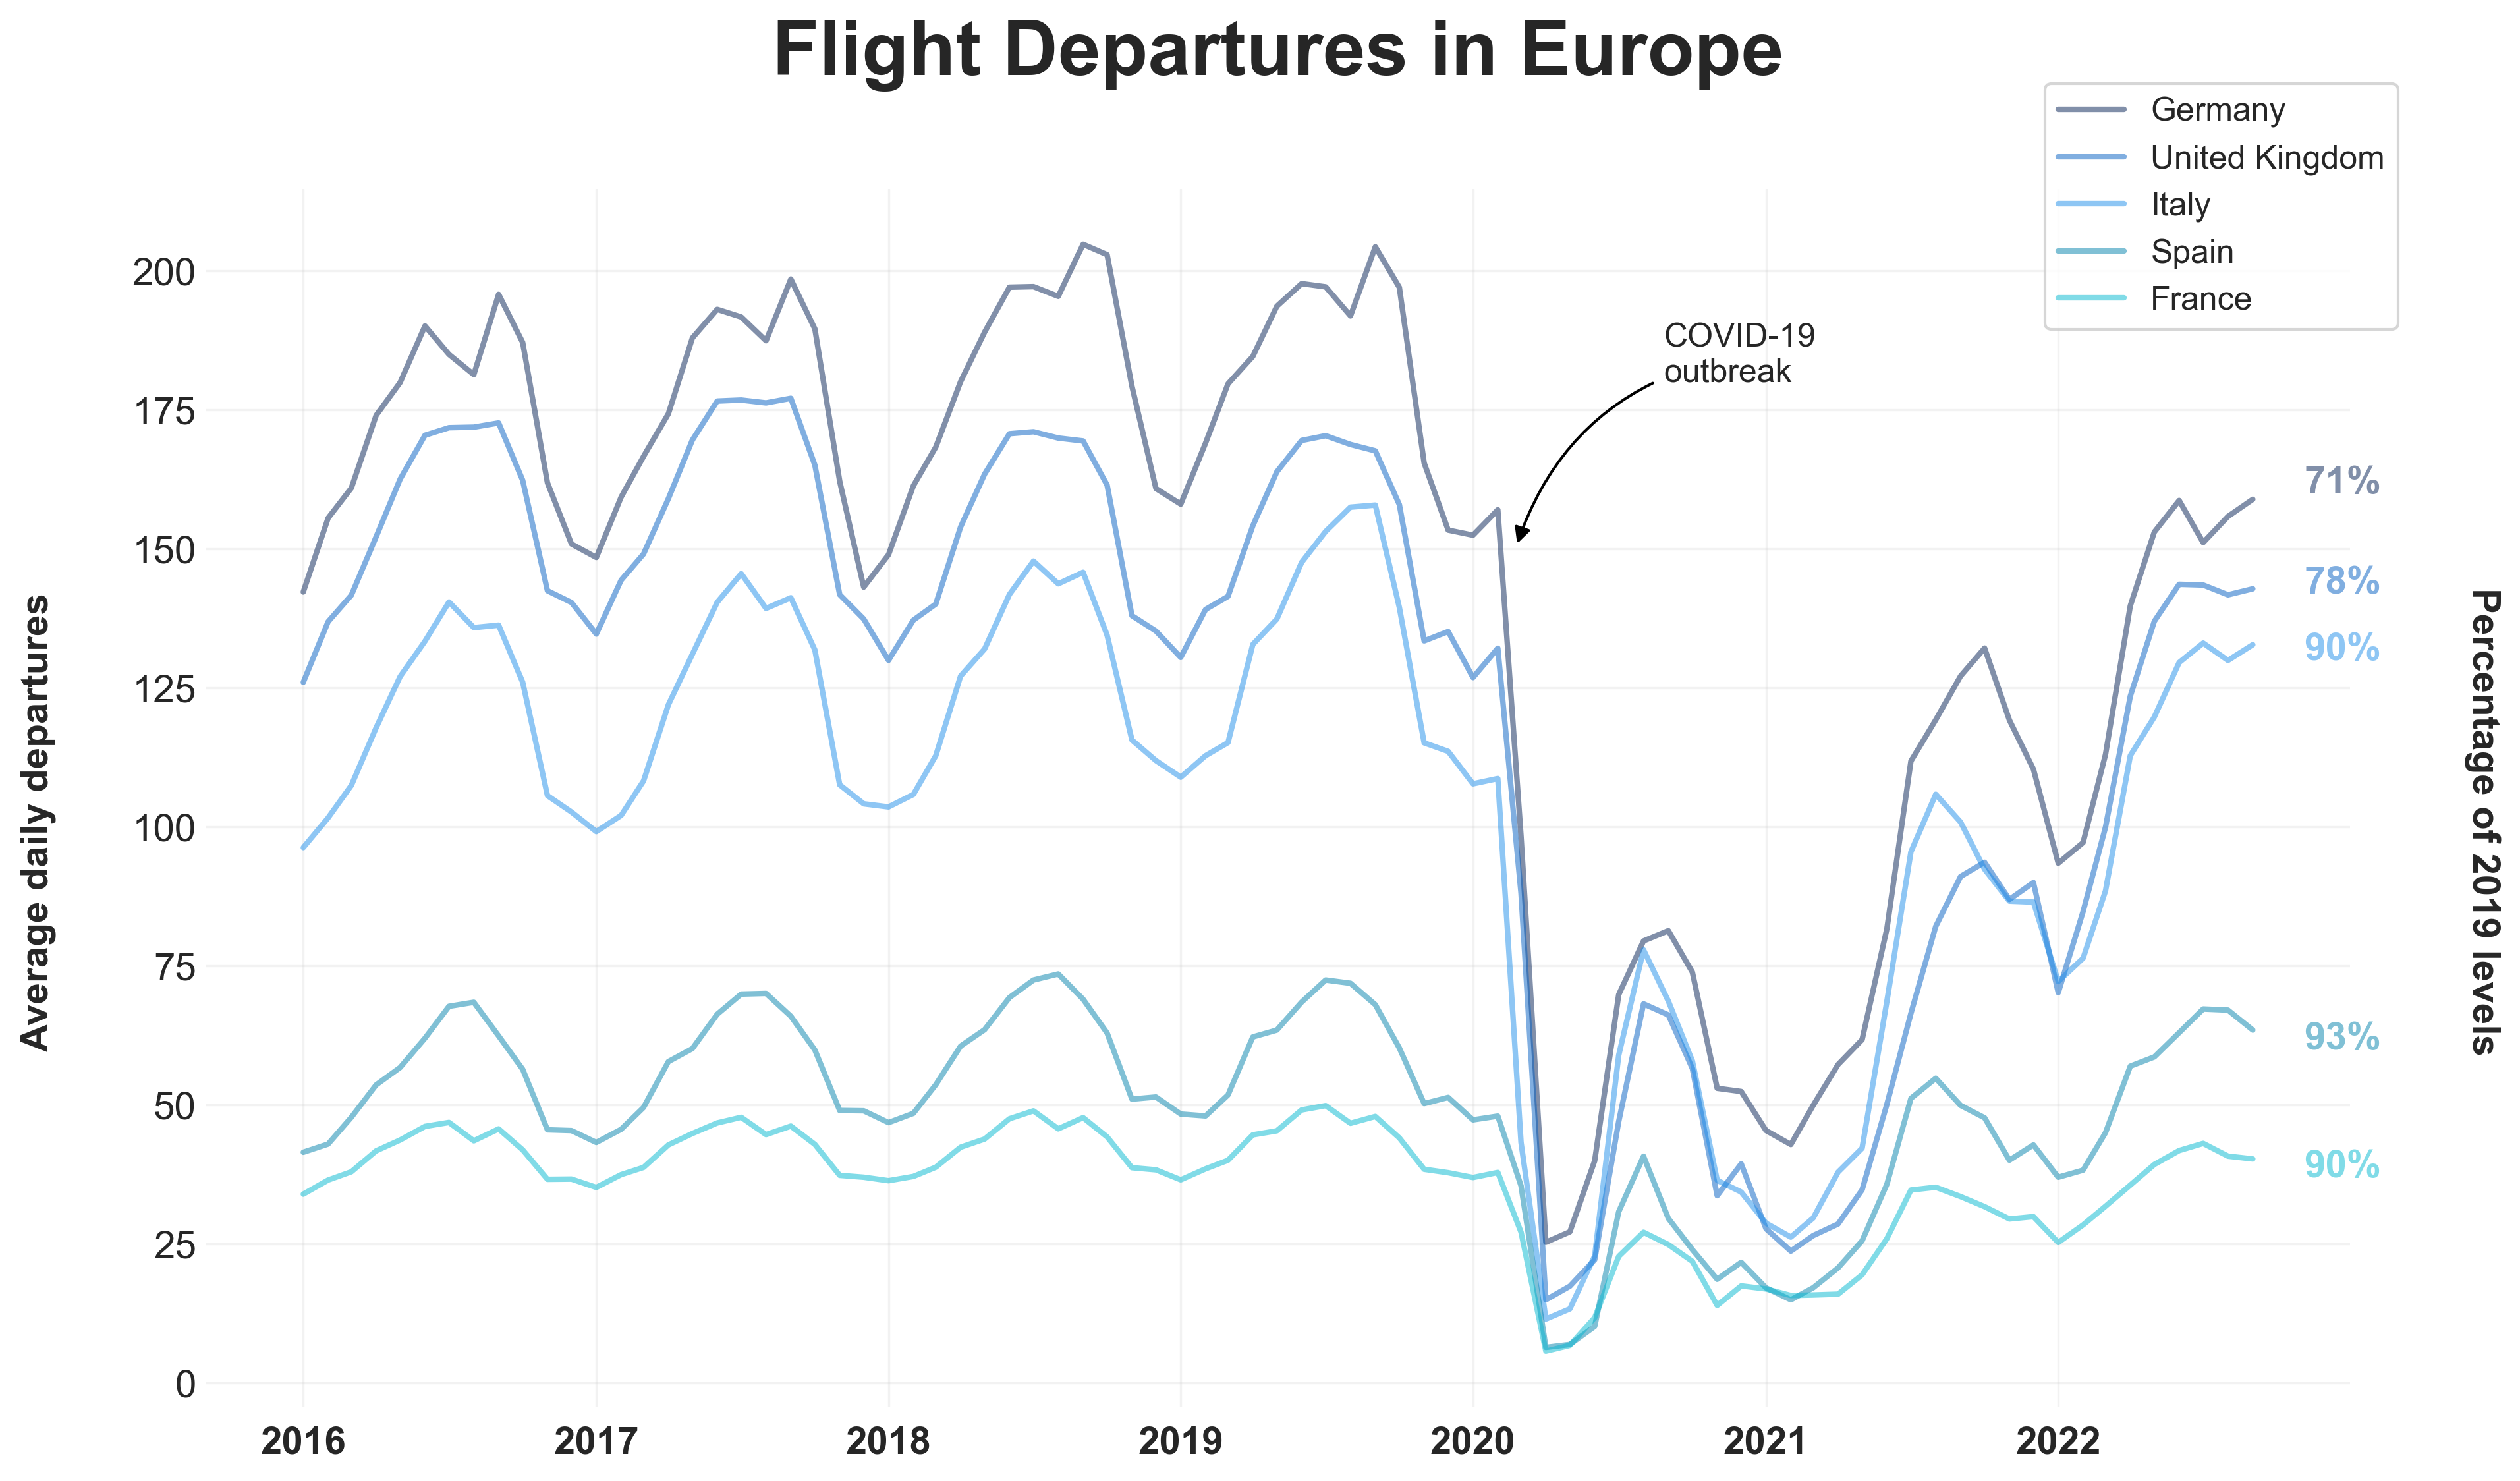

In [34]:
sns.set_style('white')

fig, ax = plt.subplots(dpi=300, figsize=(14, 8))

colours = ['#052155', '#035FC2', '#1E8EEA', '#0283AC', '#03B8D0']
order = ['Germany', 'United Kingdom', 'Italy', 'Spain', 'France']

sns.lineplot(data=eu_flights, x='year_month', y='Total_departures', hue='Country', hue_order=order, palette=colours, estimator='mean', errorbar=None, alpha=0.5, linewidth=2)

ax.xaxis.set_tick_params(labelsize = 14)
ax.set_xticklabels(range(2015, 2024), weight='bold')

plt.title('Flight Departures in Europe', fontsize=28, weight='bold', x=.5, y=1.08)
ax.yaxis.tick_left()
ax.yaxis.set_tick_params(labelsize = 14)
ax.set_xlabel('')
ax.set_ylabel('Average daily departures', weight='bold', fontsize=14)
ax.yaxis.set_label_position("left")
ax.yaxis.set_label_coords(-0.07, .48)
ax.tick_params(axis='y', zorder=0, length=0)

ax2 = ax.twinx()

ax2.set_yticklabels('')
ax2.tick_params(axis='y', zorder=0, length=0)
ax2.set_ylabel('Percentage of 2019 levels', weight='bold', fontsize=14, rotation=270)
ax2.yaxis.set_label_coords(1.07, .48)

leg = ax.legend(fontsize=12, bbox_to_anchor=(1.03, 1.1), markerscale=3.0)

for lh in leg.legendHandles: 
    lh.set_alpha(0.5)

for legobj in leg.legendHandles:
    legobj.set_linewidth(2.0)    
    
ax.set_facecolor('#FFFFFF')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax.annotate("COVID-19\noutbreak",
            xy=(18315, 150),
            xytext=(18500, 180),
            size=12,
            arrowprops={'arrowstyle': '-|>', 'connectionstyle': 'arc3,rad=0.3', 'color': 'black'})

ax.annotate("71%", xy=(19300, 160), xytext=(19300, 160), size=14, weight='bold', color='#052155', alpha=0.5)
ax.annotate("78%", xy=(19300, 142), xytext=(19300, 142), size=14, weight='bold', color='#035FC2', alpha=0.5)
ax.annotate("90%", xy=(19300, 130), xytext=(19300, 130), size=14, weight='bold', color='#1E8EEA', alpha=0.5)
ax.annotate("93%", xy=(19300, 60), xytext=(19300, 60), size=14, weight='bold', color='#0283AC', alpha=0.5)
ax.annotate("90%", xy=(19300, 37), xytext=(19300, 37), size=14, weight='bold', color='#03B8D0', alpha=0.5)

ax.grid(visible=True, alpha=0.25)

plt.show()

#### Section summary:
- Comparing current average daily departures, to those in 2019, the UK has had a worse recovery than Italy, Spain and France. The average daily departures currently make up 78% of 2019 average for the UK, compared to 90%, 93% and 90% for Italy, Spain and France respectively. 
- The UK has had a better recovery than Germany - 78% for the UK compared to 71% for Germany.

#### Q3: Have the top busiest UK airports gone back to pre-pandemic levels?

In [35]:
uk_flights.head()

,Year,Month_num,Month,Flight_date,Airport_code,Airport_name,Country,Total_departures,Total_arrivals,Total_movements,year_month,Quarter
24,2016,1,Jan,2016-01-01,EGAA,Belfast - Aldergrove,United Kingdom,48,46,94,2016-01-01,2016Q1
25,2016,1,Jan,2016-01-01,EGAC,Belfast - City Airport,United Kingdom,24,25,49,2016-01-01,2016Q1
26,2016,1,Jan,2016-01-01,EGAE,Londonderry - Eglinton,United Kingdom,2,2,4,2016-01-01,2016Q1
27,2016,1,Jan,2016-01-01,EGBB,Birmingham,United Kingdom,84,82,166,2016-01-01,2016Q1
28,2016,1,Jan,2016-01-01,EGCC,Manchester,United Kingdom,150,154,304,2016-01-01,2016Q1


In [36]:
#  Creating a list of the top 10 busiest airports in the UK
#  (by the number of total departures):

uk_top_airports = uk_flights.groupby('Airport_name')['Total_departures'].sum().sort_values(ascending=False).nlargest(10)
uk_top_airports = pd.DataFrame(uk_top_airports).reset_index()
uk_top_airports_list = uk_top_airports['Airport_name'].to_list()
uk_top_airports_list

['London - Heathrow',
 'London - Gatwick',
 'London - Stansted',
 'Manchester',
 'London - Luton',
 'Edinburgh',
 'Birmingham',
 'Glasgow',
 'East Midlands',
 'London - City']

In [37]:
#  Keeping only relevant data in the uk_flights subset:

uk_flights = uk_flights.loc[uk_flights.Year.isin([2019, 2022])]
uk_flights.drop(['Month_num', 'Month', 'Flight_date', 'Airport_code', 'Country', 'Total_arrivals', 'Total_movements', 'year_month', 'Quarter'], axis=1, inplace=True)
uk_flights.reset_index(drop=True, inplace=True)

#  Keeping only top 10 busiest airports in the uk_flights subset:

uk_flights = uk_flights.loc[uk_flights.Airport_name.isin(uk_top_airports_list)]
uk_flights

,Year,Airport_name,Total_departures
3,2019,Birmingham,103
4,2019,Manchester,181
6,2019,London - Luton,150
9,2019,London - Gatwick,344
10,2019,London - City,58
...,...,...,...
12105,2022,London - Heathrow,574
12107,2022,East Midlands,96
12109,2022,Glasgow,110
12110,2022,Edinburgh,161


In [38]:
#  Estimating median departures per year and airport:

median_departures = uk_flights.groupby(['Year', 'Airport_name'])['Total_departures'].median()
median_departures = pd.DataFrame(median_departures).reset_index()


#  Creating a pivot table:

median_departures = median_departures.pivot(index='Airport_name', columns='Year', values='Total_departures')
median_departures = median_departures.reset_index(level=0)

#  Creating a 'perc_of_2019' columns which shows 
#  what percentage of 2019 average departures constitute in 2022;
#  renaming columns:

median_departures['perc_of_2019'] = round(median_departures[2022] / median_departures[2019] * 100)
median_departures = median_departures.rename(columns={2019: 'pre-covid', 2022: 'post_covid'})
median_departures = median_departures.rename_axis(None, axis=1)
median_departures

,Airport_name,pre-covid,post_covid,perc_of_2019
0,Birmingham,149.0,120.0,81.0
1,East Midlands,93.0,84.0,90.0
2,Edinburgh,187.0,145.0,78.0
3,Glasgow,118.0,94.0,80.0
4,London - City,138.0,62.0,45.0
5,London - Gatwick,399.0,350.0,88.0
6,London - Heathrow,662.0,549.0,83.0
7,London - Luton,196.0,177.0,90.0
8,London - Stansted,279.0,263.0,94.0
9,Manchester,280.0,246.0,88.0


In [39]:
#  Creating a list of airports ordered from highest perc_of_2019 to lowest:

median_departures_ordered = median_departures.sort_values('perc_of_2019', ascending=False)
order = median_departures_ordered['Airport_name'].to_list()
order

['London - Stansted',
 'East Midlands',
 'London - Luton',
 'London - Gatwick',
 'Manchester',
 'London - Heathrow',
 'Birmingham',
 'Glasgow',
 'Edinburgh',
 'London - City']

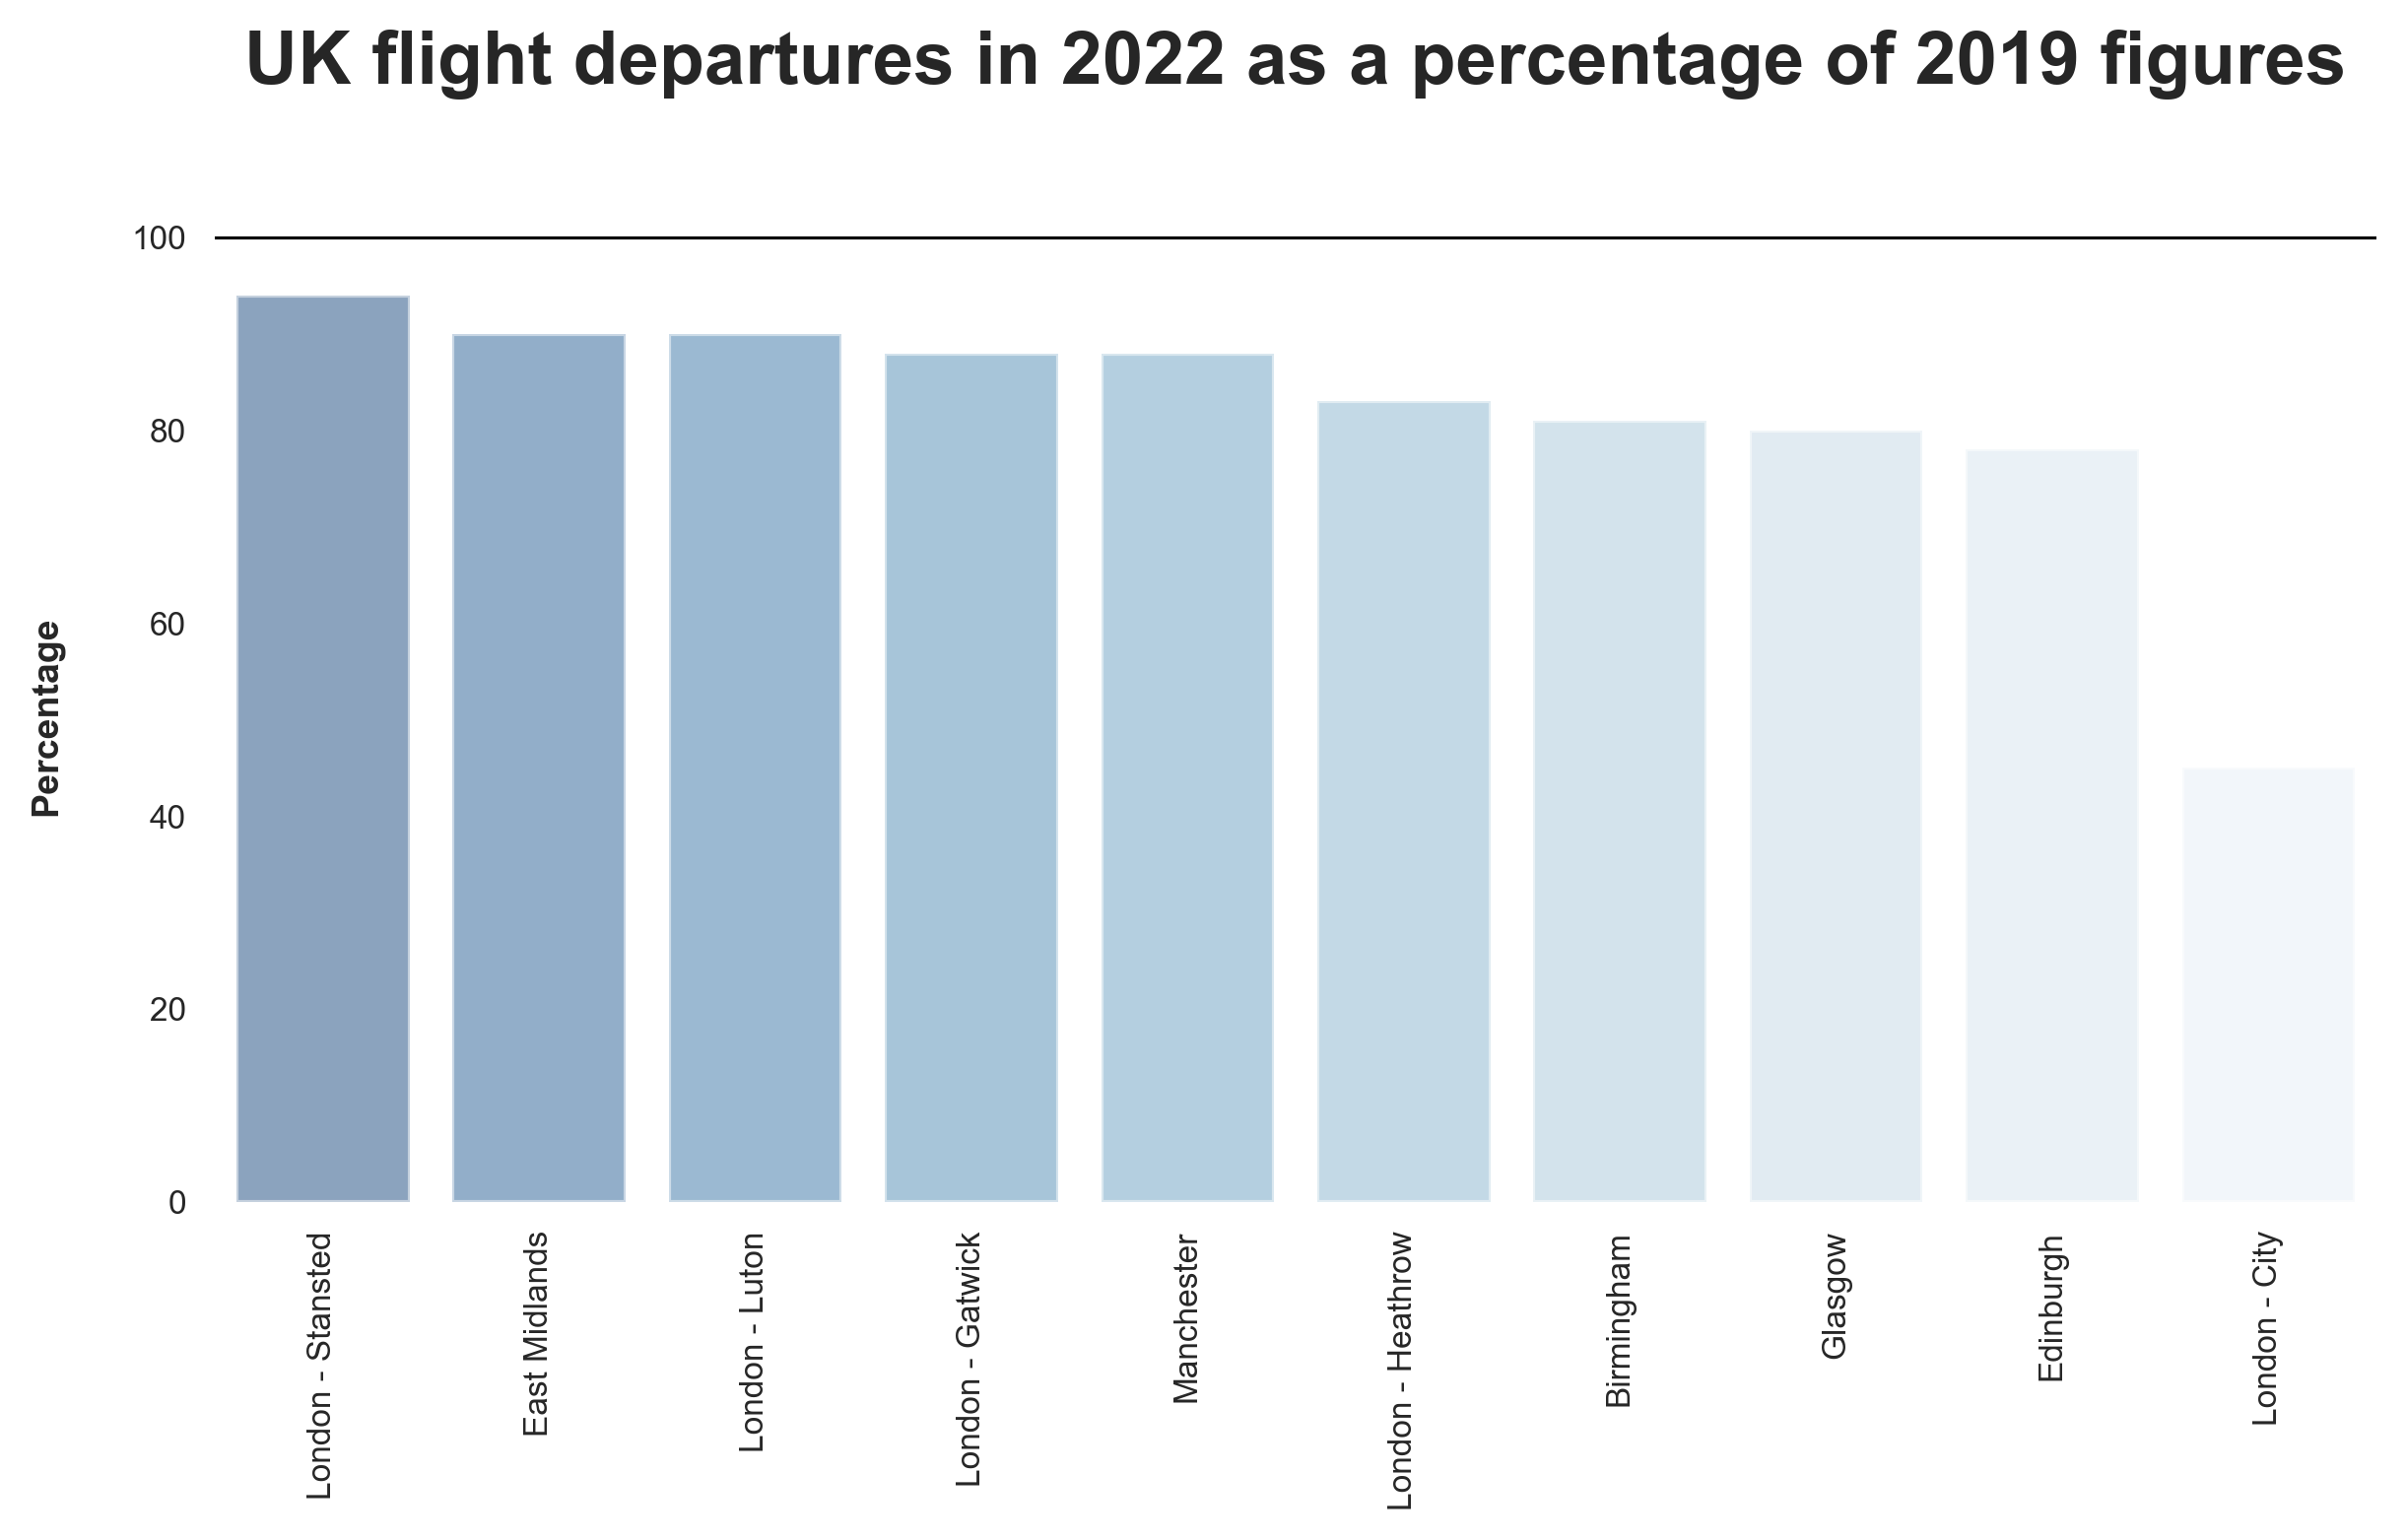

In [40]:
sns.set_style('white')

fig, ax = plt.subplots(dpi=300, figsize=(8, 4))
fig.patch.set_facecolor('#FFFFFF')

plt.tight_layout()

pal = sns.color_palette("Blues", len(median_departures))
rank = median_departures.sort_values('perc_of_2019', ascending=False) 

sns.barplot(data=median_departures, y='perc_of_2019', x='Airport_name', order=order, palette=np.array(pal[::-1]), alpha=0.5)

ax.xaxis.set_tick_params(labelsize = 8, rotation=90)

plt.title('UK flight departures in 2022 as a percentage of 2019 figures', fontsize=18, weight='bold', x=.5, y=1.08)

ax.yaxis.set_tick_params(labelsize = 8)
ax.set_xlabel('')
ax.set_ylabel('Percentage', weight='bold', fontsize=9)
ax.yaxis.set_label_position("left")
ax.yaxis.set_label_coords(-0.07, .48)
    
ax.set_facecolor('#FFFFFF')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.axhline(100, color='black', linewidth=0.75)

plt.show()

#### Section summary:
- All of the top busiest airports in the UK do not have the same number of departures that they had before the pandemic.
- Airports where flight departures are the closest to pre-pandemic levels are London Stansted, followed by East Midlands, London Luton, London Gatwick and Manchester. 
- The worst recovery in terms of flight departure numbers is experienced by London City airport.

#### Q4: How do post-pandemic flight departure delays compare to pre-pandemic levels in the UK?

In [41]:
delays.head()

,Year,Month_num,Month,Flight_date,Airport_code,Airport_name,Country,Total_departures,Minutes_delayed
0,2016,1,Jan,01/01/2016,EBAW,Antwerp,Belgium,4,0.0
1,2016,1,Jan,01/01/2016,EBBR,Brussels,Belgium,174,48.0
2,2016,1,Jan,01/01/2016,EBCI,Charleroi,Belgium,45,0.0
4,2016,1,Jan,01/01/2016,EBOS,Ostend-Bruges,Belgium,7,0.0
5,2016,1,Jan,01/01/2016,EDDB,Berlin - Brandenburg,Germany,98,36.0


In [42]:
uk_delays = delays[delays['Country'] == 'United Kingdom']
uk_delays.head()

,Year,Month_num,Month,Flight_date,Airport_code,Airport_name,Country,Total_departures,Minutes_delayed
24,2016,1,Jan,01/01/2016,EGAA,Belfast - Aldergrove,United Kingdom,48,7.0
25,2016,1,Jan,01/01/2016,EGAC,Belfast - City Airport,United Kingdom,24,0.0
26,2016,1,Jan,01/01/2016,EGAE,Londonderry - Eglinton,United Kingdom,2,0.0
27,2016,1,Jan,01/01/2016,EGBB,Birmingham,United Kingdom,84,4.0
28,2016,1,Jan,01/01/2016,EGCC,Manchester,United Kingdom,150,19.0


In [43]:
#  Subsetting uk_delays to 2019 and 2022, 
#  keeping only relevant columns,
#  keeping only top busiest airports:

uk_delays = uk_delays.loc[uk_delays.Year.isin([2019, 2022])]
uk_delays.drop(['Month_num', 'Month', 'Flight_date', 'Country'], axis=1, inplace=True)
uk_delays.reset_index(drop=True, inplace=True)
uk_delays = uk_delays.loc[uk_delays.Airport_name.isin(uk_top_airports_list)]
uk_delays.head()

,Year,Airport_code,Airport_name,Total_departures,Minutes_delayed
3,2019,EGBB,Birmingham,103,6.0
4,2019,EGCC,Manchester,181,36.0
6,2019,EGGW,London - Luton,150,54.0
8,2019,EGKK,London - Gatwick,344,161.0
9,2019,EGLC,London - City,58,0.0


In [44]:
uk_delays['Minutes_delayed'] = pd.to_numeric(uk_delays['Minutes_delayed'])


#  Grouping by year and airport, 
#  creating column 'Flights_delayed_%' which shows the percentage of flights delayed 
#  in a given year and airport:

delayed_count = uk_delays.groupby(['Year', 'Airport_name'])['Minutes_delayed'].apply(lambda x: (x!=0).sum())
total_count = uk_delays.groupby(['Year', 'Airport_name'])['Minutes_delayed'].count()
perc_delayed = delayed_count / total_count * 100
perc_delayed = pd.DataFrame(perc_delayed).reset_index()
perc_delayed.rename(columns={'Minutes_delayed': 'Flights_delayed_%'}, inplace=True)
perc_delayed

,Year,Airport_name,Flights_delayed_%
0,2019,Birmingham,99.178082
1,2019,East Midlands,43.287671
2,2019,Edinburgh,99.726027
3,2019,Glasgow,87.123288
4,2019,London - City,95.054945
5,2019,London - Gatwick,100.000000
6,2019,London - Heathrow,100.000000
7,2019,London - Luton,99.726027
8,2019,London - Stansted,100.000000
9,2019,Manchester,100.000000


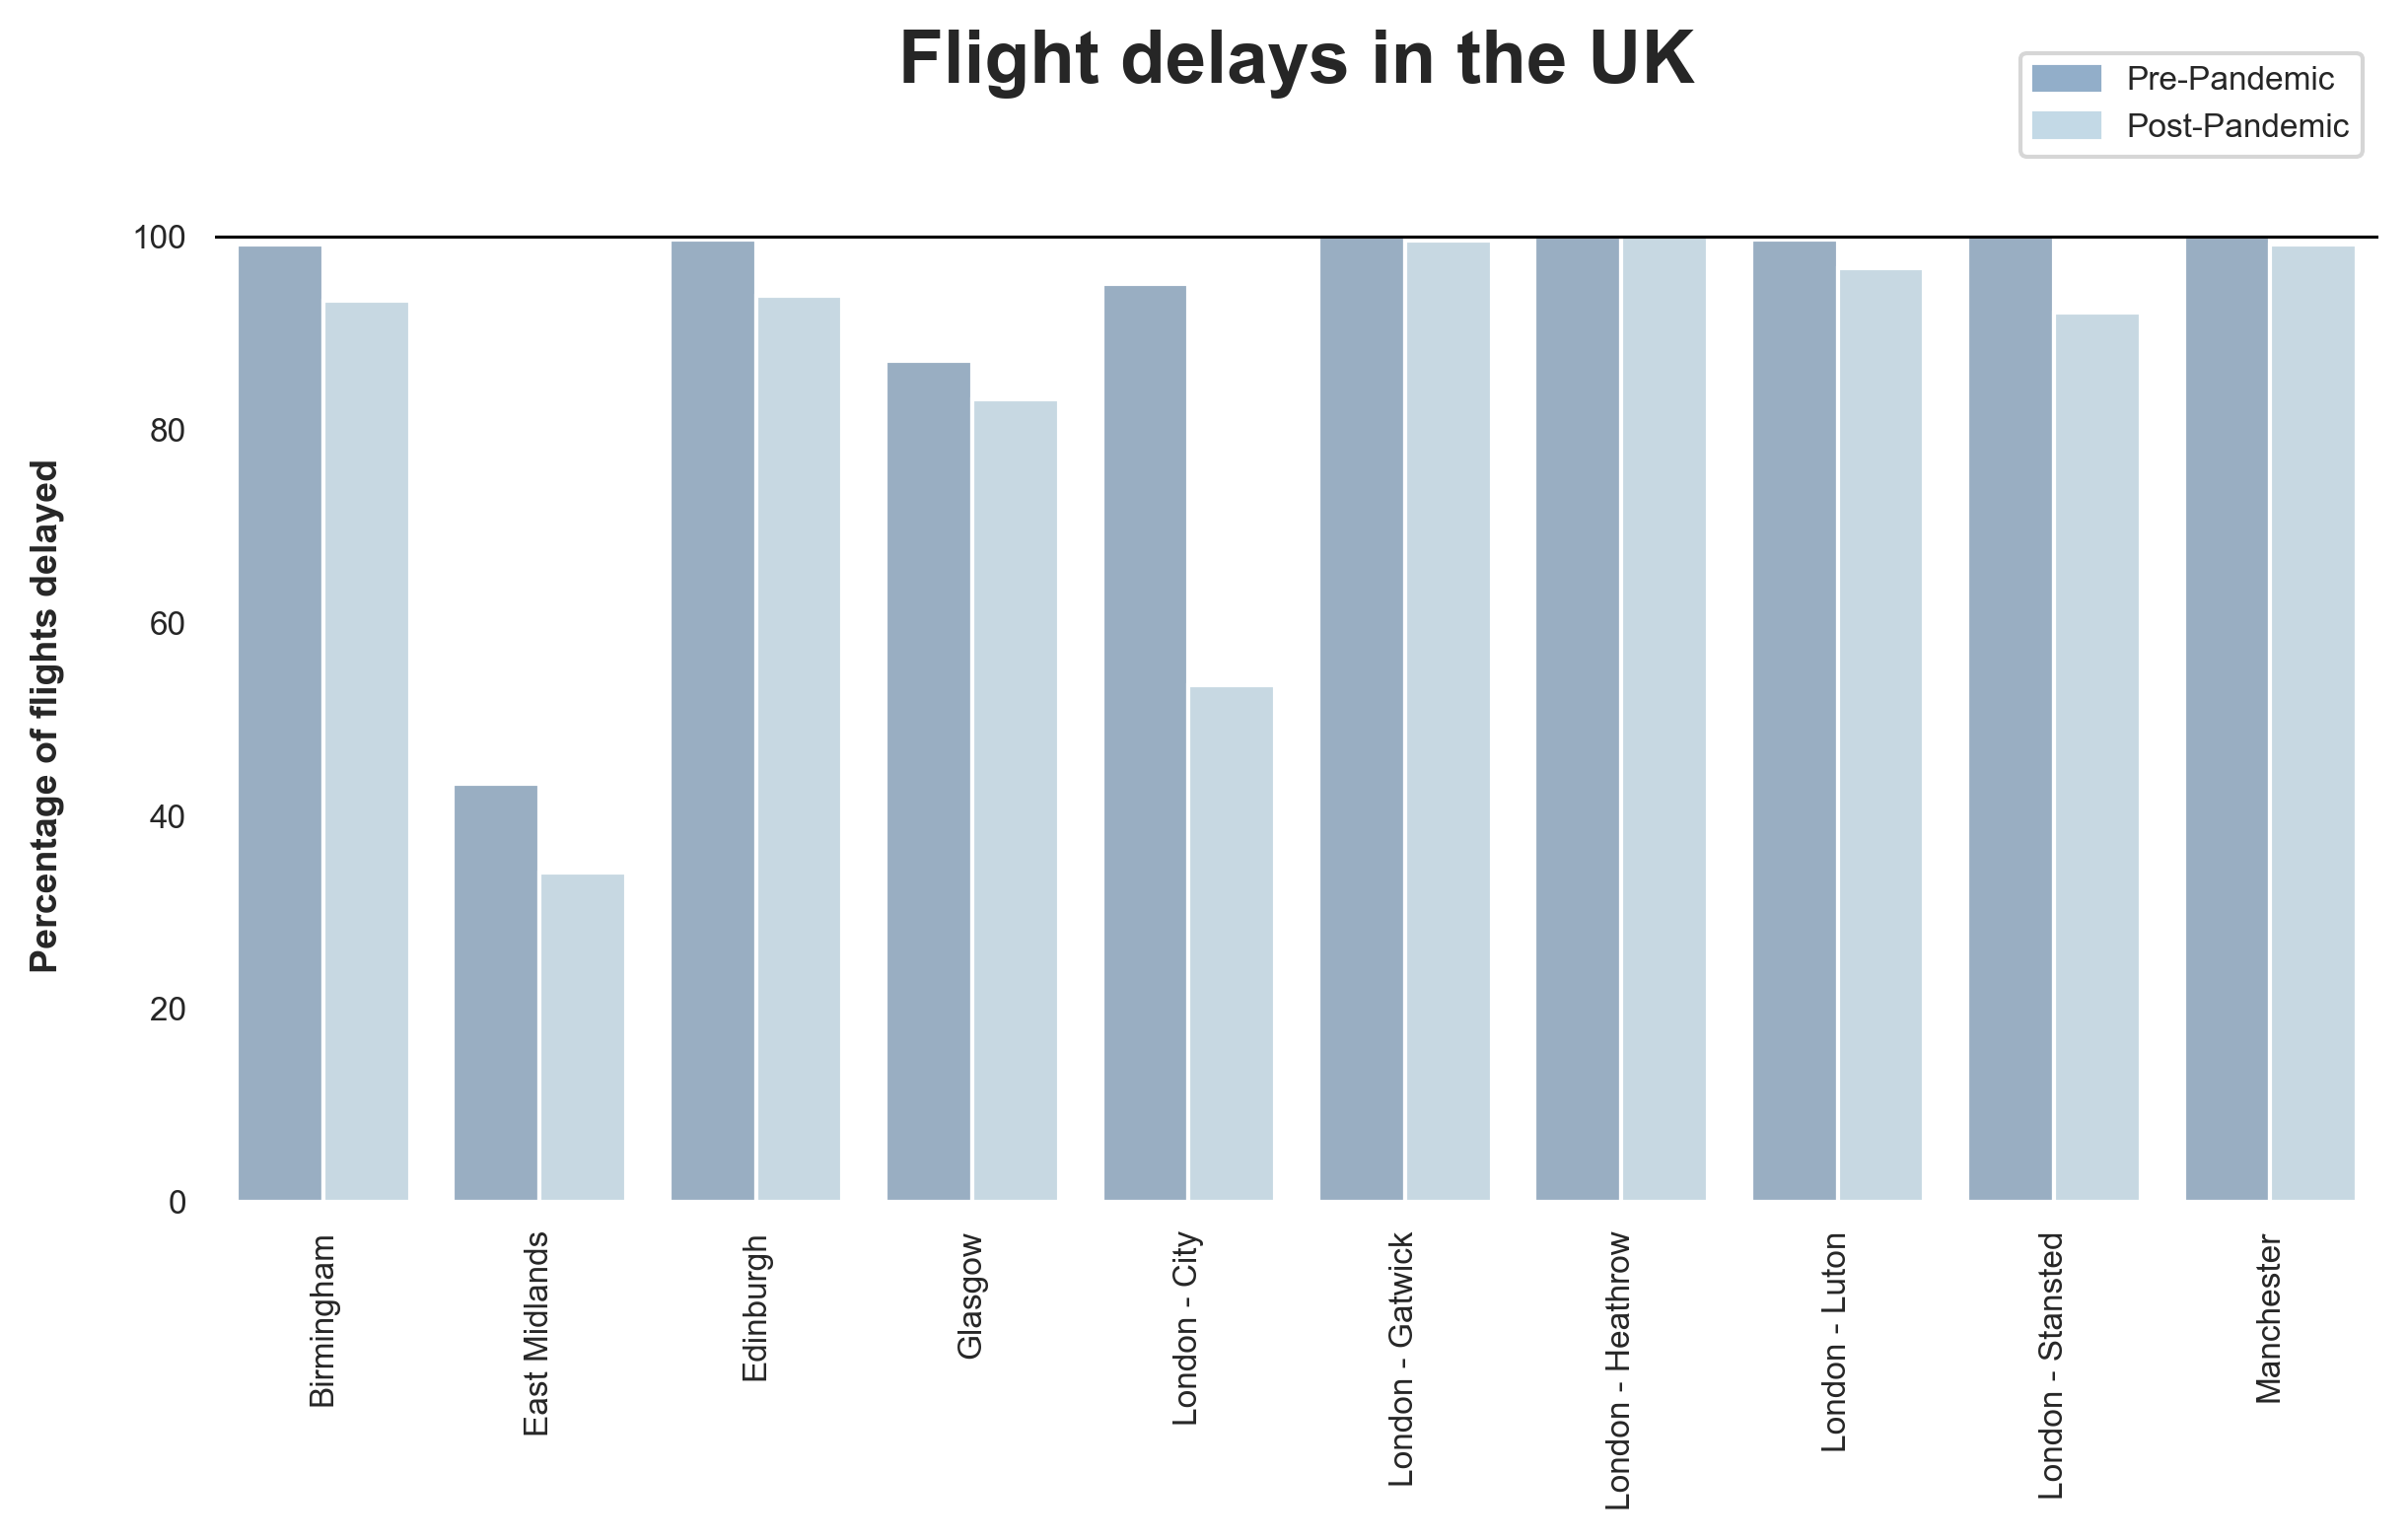

In [45]:
sns.set_style('white')

fig, ax = plt.subplots(dpi=300, figsize=(8, 4))
fig.patch.set_facecolor('#FFFFFF')

plt.tight_layout()

colours = ['#92AEC9', '#C3D9E6']

sns.barplot(data=perc_delayed, y='Flights_delayed_%', x='Airport_name', hue='Year', palette=colours)

ax.xaxis.set_tick_params(labelsize = 8, rotation=90)

plt.title('Flight delays in the UK', fontsize=18, weight='bold', x=.5, y=1.08)

ax.yaxis.set_tick_params(labelsize = 8)
ax.set_xlabel('')
ax.set_ylabel('Percentage of flights delayed', weight='bold', fontsize=9)
ax.yaxis.set_label_position("left")
ax.yaxis.set_label_coords(-0.07, .48)

patch_1 = mpatches.Patch(color='#92AEC9', label='Pre-Pandemic')
patch_2 = mpatches.Patch(color='#C3D9E6', label='Post-Pandemic')
plt.legend(handles=[patch_1, patch_2], bbox_to_anchor=(1.0, 1.15), fontsize=8)
    
ax.set_facecolor('#FFFFFF')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.axhline(100, color='black', linewidth=0.75)

#ax.grid(visible=True, alpha=0.25)

plt.show()

#### Section summary:
- Although UK airports have experienced a number of issues getting back on track after COVID-19 pandemic, almost all airports (apart from London Heathrow) still had a slightly lower proportion flights delayed in 2022 compared to 2019. 